In [446]:
# Importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt

# Importando bilbioteca para platagem 3D:
from matplotlib import cm

# Importando bibliotecas Scikit Learn; 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Usando função mágica para plotagem
%matplotlib inline

In [447]:
# Definindo a quantidade de amostras:
M = 1000

# Definindo o valor dos pesos:
a1 = 1
a2 = 1

# Definindo o conjunto de features: 
x1 = (np.random.uniform(1000, 2000, M)).reshape(M, 1)
x2 = (np.random.uniform(0, 1, M)).reshape(M, 1)

# Definindo a função de ruído:
w  = np.random.randn(M, 1)

# Definindo o conjunto de labels: 
y = a1 * x1 + a2 * x2 + w

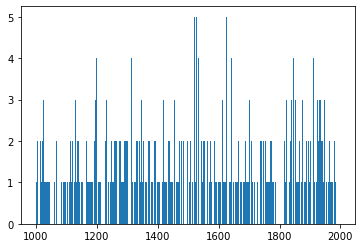

In [448]:
# Plotando o histograma de x1: 
plt.hist(x1, 1000)
plt.show()

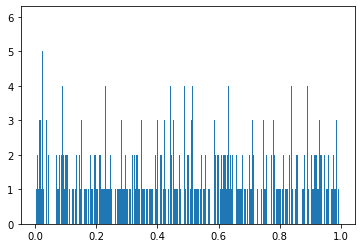

In [449]:
# Plotando o histograma de x2: 
plt.hist(x2, 1000)
plt.show()

In [450]:
# Concatenando os valores das features:
X = np.c_[x1, x2]

# Aplicando a formula fechada:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
y_hat = a_opt[0, 0] * x1 + a_opt[1, 0] * x2
j_opt = (1/M)*np.sum(np.power((y - y_hat), 2))

In [471]:
# Imprimindo os valores encontrados pela FORMULA:
print('O a1 ótimo encontrado pela formula fechada é: {}'.format(a_opt[0, 0]))
print('O a2 ótimo encontrado pela formula fechada é: {}'.format(a_opt[1, 0]))

O a1 ótimo encontrado pela formula fechada é: 1921.3228262315424
O a2 ótimo encontrado pela formula fechada é: 807.21262084934


In [452]:
# Criando a SUPERFÍCIE DE ERRO:

# Definindo o número de iterações:
N = 1000

# Definindo valores lINEARMENTE espaçados para os PESOS
a0 = np.linspace(-1000.0, 1002.0, N)
a1 = np.linspace(-1.0, 2001.0, N)

# Criação da malha para plotagem gráfica
A0, A1 = np.meshgrid(a0, a1)

# Criando o vetor para armazenamento dos valores de ERRO:
J = np.zeros((N, N))

#LOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        y_hat = A0[iter1][iter2] * x1 + A1[iter1][iter2] * x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - y_hat))

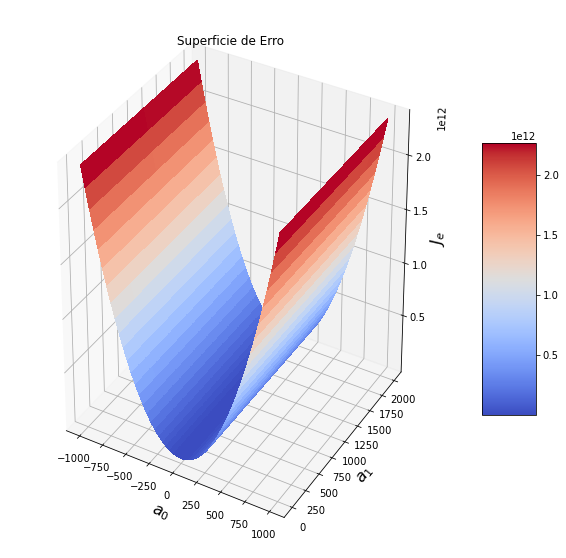

In [453]:
# Plotando o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=16)
ax.set_ylabel('$a_1$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

In [454]:
# Definindo o PASSO DE APRENDIZAGEM (alpha):
alpha = 0.5

# Criando a matriz de pesos final para ARMAZENAMENTO:
a = np.zeros((2, 1))

# Definindo os PESOS INICIAIS:
a[0, 0] = -1000
a[1, 0] = 1

# Criando a matriz HISTÓRICA dos pesos:
a_hist = np.zeros((2, M+1))

# Criando a matriz de erro 
jgd = np.zeros(M+1)

# Definindo o primeiro valor do erro
jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [455]:
# Definindo a quantidade máxima de iterações:
maxIterNum = 1000

# Definindo a iteração inicial
iteration = 0

# Criando a matriz de GRADIENTES HISTÓRICO:
grad_hist = np.zeros((2, M))

# Definindo o valor de error:
error = 1

In [456]:
# LOOP do GRADIENTE:
while (iteration < maxIterNum and error > 0.00001):
    
    gradients = -(2.0/M) * X.T.dot(y - X.dot(a))
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration + 1] = a[0, 0]
    a_hist[1, iteration + 1] = a[1, 0]
    
    jgd[iteration + 1] = (1.0/M) * sum(np.power((y - X.dot(a)), 2))
    
    error = np.abs(jgd[iteration+1] - jgd[iteration])
                                       
    iteration = iteration + 1

<ipython-input-456-6c8fd5223d64>:14: RuntimeWarning: overflow encountered in add
  jgd[iteration + 1] = (1.0/M) * sum(np.power((y - X.dot(a)), 2))
<ipython-input-456-6c8fd5223d64>:14: RuntimeWarning: overflow encountered in power
  jgd[iteration + 1] = (1.0/M) * sum(np.power((y - X.dot(a)), 2))
<ipython-input-456-6c8fd5223d64>:16: RuntimeWarning: invalid value encountered in double_scalars
  error = np.abs(jgd[iteration+1] - jgd[iteration])


In [457]:
# Imprimindo os valores encontrados pelo GRADIENTE:
print('O valor de a0 ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a1 ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))

O valor de a0 ótimo encontrado pelo gradiente é: -8.141301152689562e+155
O valor de a1 ótimo encontrado pelo gradiente é: -2.5107236726698883e+152


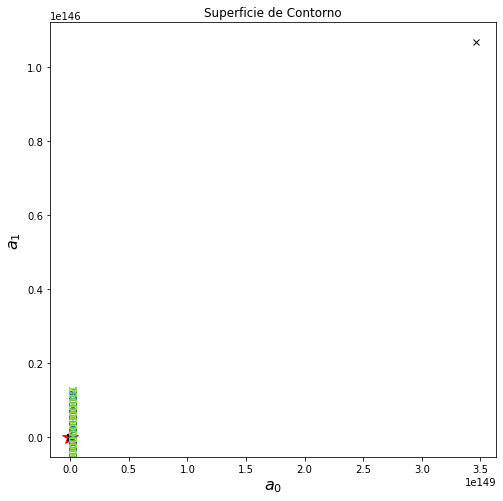

In [458]:
# Plotando a superfície de contorno dos PESOS vs ERRO

fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a_1$', fontsize=16)
plt.title('Superficie de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=16)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.show()

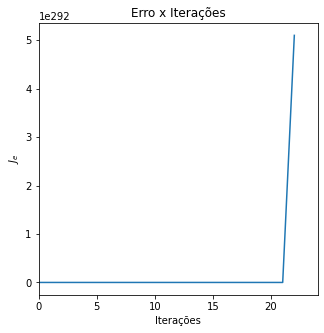

In [459]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
plt.xlabel('Iterações')
plt.ylabel('$J_e$')
plt.title('Erro x Iterações')
plt.show()

# Teorica

O algoritmo nao converge para o valor otimo

O algoritmo nao consegue divergir devido a discrepancia entre os valores das features, fazendo com que ele enfrente problemas

Pode ser feito uma padronização das features para que os valores fique mais proximos e o min global mais facilmente encontrado.

# Min-Max

In [460]:
# Concatena os valores das FEATURES
X = np.c_[x1, x2]

# Instancia o escalonador:
scaler = MinMaxScaler()

# Faz o treinamento das FEATURES:
scaler.fit(X)

# Faz o escalonamento das FEATURES:
X = scaler.transform(X)

# Padroniza os valores escalonados:
x1 = X[:, 0].reshape(M, 1)
x2 = X[:, 1].reshape(M, 1)

In [461]:
# Concatena os valores das FEATURES
X = np.c_[x1, x2]

# Instancia o escalonador:
scaler = MinMaxScaler()

# Faz o treinamento das FEATURES:
scaler.fit(X)

# Faz o escalonamento das FEATURES:
X = scaler.transform(X)

# Padroniza os valores escalonados:
x1 = X[:, 0].reshape(M, 1)
x2 = X[:, 1].reshape(M, 1)

In [466]:
# Criando a SUPERFÍCIE DE ERRO:

# Defininindo o número de iterações:
N = 400

# Definindo valores LINEARMENTE espaçados para os PESOS:
a0 = np.linspace(-1000.0, 1002.0, N)
a1 = np.linspace(-1.0, 2001.0, N)

# Criando a malha da superfície de ERRO:
A1, A2 = np.meshgrid(a1, a2)

# Criando a matriz para armazenamento dos erros:
J = np.zeros((N,N))

# lOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        
        y_hat = A1[iter1][iter2] * x1 + A2[iter1][iter2] * x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - y_hat))

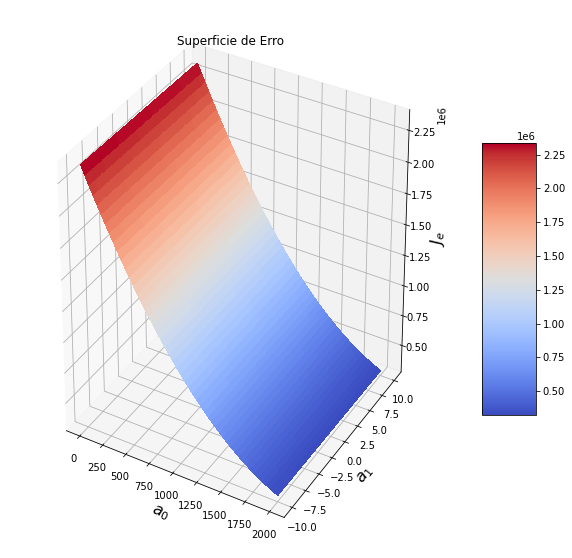

In [467]:
# Plotando o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=16)
ax.set_ylabel('$a_1$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

In [469]:
# Concatena as FEATURES:
X = np.c_[x1, x2]

# Aplica a formula fechada:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
y_hat = X.dot(a_opt)
j_opt = (1/M)*np.sum(np.power((y - y_hat), 2) )

In [470]:
# Imprimindo os PESOS ÓTIMOS encontrados pela FORMULA FECHADA:
print('O valor de a1 ótimo encontrado é: {}'.format(a_opt[0, 0]))
print('O valor de a2 ótimo encontrado é: {}'.format(a_opt[1, 0]))

O valor de a1 ótimo encontrado é: 1921.3228262315424
O valor de a2 ótimo encontrado é: 807.21262084934


In [472]:
# Definindo o PASSO DE APRENDIZAGEM (alpha):
alpha = 0.5

# Criando a matriz de pesos final para ARMAZENAMENTO:
a = np.zeros((2, 1))

# Definindo os PESOS INICIAIS:
a[0, 0] = -1000
a[1, 0] = 1

# Criando a matriz HISTÓRICA dos pesos:
a_hist = np.zeros((2, M+1))

# Criando a matriz de erro 
jgd = np.zeros(M+1)

# Definindo o primeiro valor do erro
jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [473]:
# Definindo a quantidade máxima de iterações:
maxIterNum = 1000

# Definindo a iteração inicial
iteration = 0

# Criando a matriz de GRADIENTES HISTÓRICO:
grad_hist = np.zeros((2, M))

# Definindo o valor de error:
error = 1

In [475]:
# LOOP do GRADIENTE:
while (iteration < maxIterNum and error > 0.00001):
    
    gradients = -(2.0/M) * X.T.dot(y - X.dot(a))
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration + 1] = a[0, 0]
    a_hist[1, iteration + 1] = a[1, 0]
    
    jgd[iteration + 1] = (1.0/M) * sum(np.power((y - X.dot(a)), 2))
    
    error = np.abs(jgd[iteration+1] - jgd[iteration])
                                       
    iteration = iteration + 1

In [477]:
# Imprimindo os PESOS ÓTIMOS encontrados pela FORMULA FECHADA:
print('O valor de a1 ótimo encontrado é: {}'.format(a[0, 0]))
print('O valor de a2 ótimo encontrado é: {}'.format(a[1, 0]))

O valor de a1 ótimo encontrado é: 1921.3069159293032
O valor de a2 ótimo encontrado é: 807.2291447510762


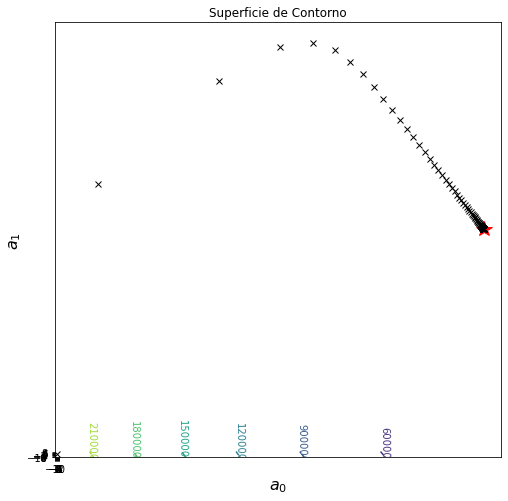

In [480]:
# Plotando a superfície de contorno dos PESOS vs ERRO

fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a_1$', fontsize=16)
plt.title('Superficie de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=16)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-10, 10, step=2.0))
plt.yticks(np.arange(-10, 10, step=2.0))
plt.show()

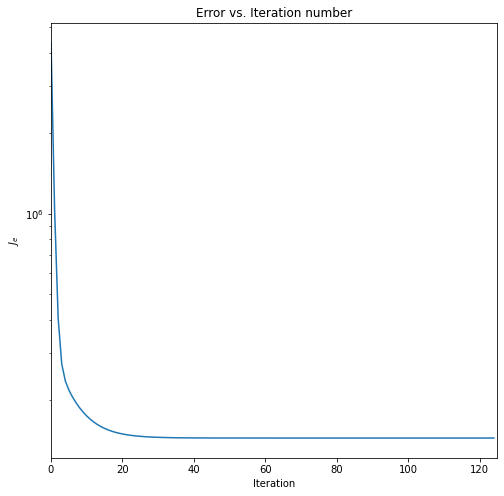

In [481]:
# Plotando o GRÁFICO do ERRO vs NÚMERO DE ITERAÇÕES:
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

# Padronização

In [482]:
X = np.c_[x1, x2]

# Instantiate scaler.
scaler = StandardScaler()

# Fit on training data column.
scaler.fit(X)
    
# Transform the training data.
X = scaler.transform(X)

In [484]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

In [485]:
# Criando a SUPERFÍCIE DE ERRO:

# Definindo o número de iterações:
N = 1000

# Definindo valores lINEARMENTE espaçados para os PESOS
a0 = np.linspace(-1000.0, 1002.0, N)
a1 = np.linspace(-1.0, 2001.0, N)

# Criação da malha para plotagem gráfica
A0, A1 = np.meshgrid(a0, a1)

# Criando o vetor para armazenamento dos valores de ERRO:
J = np.zeros((N, N))

#LOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        y_hat = A0[iter1][iter2] * x1 + A1[iter1][iter2] * x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - y_hat))

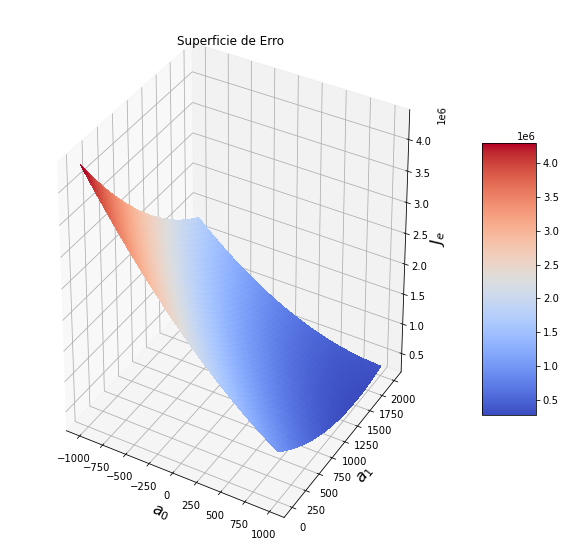

In [486]:
# Plotando o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=16)
ax.set_ylabel('$a_1$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

In [487]:
# Definindo o PASSO DE APRENDIZAGEM (alpha):
alpha = 0.5

# Criando a matriz de pesos final para ARMAZENAMENTO:
a = np.zeros((2, 1))

# Definindo os PESOS INICIAIS:
a[0, 0] = -1000
a[1, 0] = 1

# Criando a matriz HISTÓRICA dos pesos:
a_hist = np.zeros((2, M+1))

# Criando a matriz de erro 
jgd = np.zeros(M+1)

# Definindo o primeiro valor do erro
jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [488]:
# Definindo a quantidade máxima de iterações:
maxIterNum = 1000

# Definindo a iteração inicial
iteration = 0

# Criando a matriz de GRADIENTES HISTÓRICO:
grad_hist = np.zeros((2, M))

# Definindo o valor de error:
error = 1

In [490]:
# LOOP do GRADIENTE:
while (iteration < maxIterNum and error > 0.00001):
    
    gradients = -(2.0/M) * X.T.dot(y - X.dot(a))
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration + 1] = a[0, 0]
    a_hist[1, iteration + 1] = a[1, 0]
    
    jgd[iteration + 1] = (1.0/M) * sum(np.power((y - X.dot(a)), 2))
    
    error = np.abs(jgd[iteration+1] - jgd[iteration])
                                       
    iteration = iteration + 1

In [491]:
# Imprimindo os valores encontrados pelo GRADIENTE:
print('O valor de a0 ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a1 ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))

O valor de a0 ótimo encontrado pelo gradiente é: 282.3627184333963
O valor de a1 ótimo encontrado pelo gradiente é: 0.22667586568806397


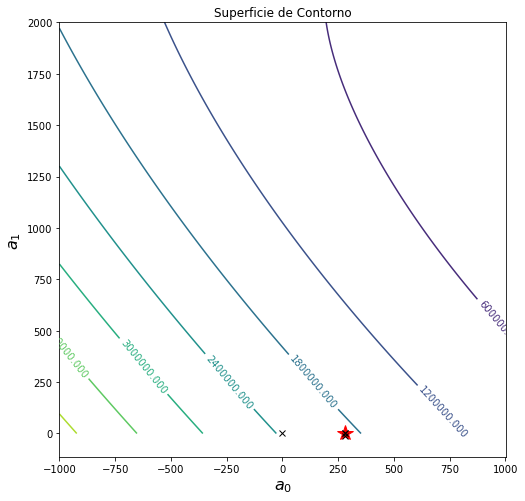

In [492]:
# Plotando a superfície de contorno dos PESOS vs ERRO

fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a_1$', fontsize=16)
plt.title('Superficie de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=16)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.show()

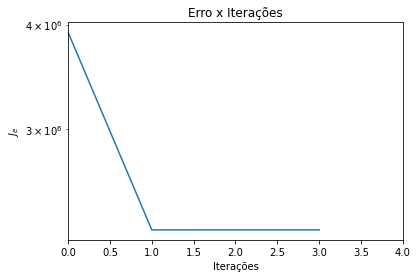

In [495]:
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iterações')
plt.ylabel('$J_e$')
plt.title('Erro x Iterações')
plt.show()